# Regression Model that Predicts Apple Prices Based on Historical Data

<img src="predict.jpeg" height=400>

# Table Of Contents
### 1. [Introduction](#introduction)

    1. Objective
    2. Parameters
    3. Outline
    
### 2. [Importing Data and Plotting](#import)

    1. Import necessary packages
    2. Import the data into a Pandas Dataframe
    3. Show the data
    4. Make ean initial plot of the data

### 3. [Exploratory Data Analysis](#explore)
### 4. [Split Data: Testing and training](#split)
### 5. [Outliers](#outliers)
### 6. [Regression Model](#regress)
    1. Taking estimates
    2. Least squares
    3. sklearn
### 7. [Conclusion](#conclude)

## 1. Introduction <a name="introduction"></a>
There are various factors that contribute to the perfomance of a business. These factors include the price of the goods sold, how much stock you have etc. Decesions (such as how much stock to have on hand and what price to set the Golden Delicious Apples to.)to improve the perfomance have to be made given the known knowledge.In this project we are given data of Golden Delecious Apples and certain parameters ;and will be  constructing a regression algorithm that will accurately predict how much a kilogram of the Apples will cost.


### 1.1. Objective 
In this notebook we will design a regression model that will predict the cost of apples based on given parameters.

### 1.2. Parameters
1. Month/Season
2. Distance travelled
3. Supplier cost
4. Grade of apple
5. Demand and Supply
6. Container used?
7. Brand of the apple
8. How ripe/mature the apple is
9. The size of the apple
10. Marketing methods used
11. Competition in the market
12. Cost of apple seedlings



## 2. Importing Data and Plotting <a name="import"></a>

#### 2.1. Import necessary packages

In [1]:
# These packages will be mainly used for data wrangling
import pandas as pd
import numpy as np

# These packages will be mostly used for plotting the data
from matplotlib import pyplot as plt
import seaborn as sns

# These packages will be mostly used to build our linear regression model so that we can make predictions from it.
import statsmodels as sm
import sklearn as skl

#### 2.2. Import the data into a Pandas Dataframe

In [2]:
#import train and test sets into DataFrames
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test_set = pd.DataFrame(pd.read_csv("df-test_set.csv"))
train_set = pd.DataFrame(pd.read_csv("df-train_set.csv"))

In [3]:
#Filter for Commodity of interest in train set
train_set = train_set[train_set["Commodities"]=="APPLE GOLDEN DELICIOUS"]

#### 2.3. Show the data 

##### 2.3.1 Showing the training data

In [4]:
#Viewing the first five rows of our train_set dataframe.
train_set.head() 

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [5]:
#The dataframe has 1952 rows and 13 columns.
train_set.shape

(1952, 13)

In [6]:
#The info method displays the nature of our data i.e datatypes and non-null count.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info summary above shows 1952 entries and it has the following data types: six float type data, two integer type data, five object type data. All columns showing zero null values.

In [8]:
#Summary statistic of each column in the dataframe.
train_set.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


##### 2.3.2. How the  testing data differs from training data

Our Test_set data has 685 rows and 13 columns, our rows are smaller than the train datawhich is expected as the bulk of our data will go into training our model.

The data types also differ in our test data, we have :five float type data, three integer type data, five object type data. All columns showing zero null values.In the training data there are six float type and two integer type data.

Test_set statistics vary from train_set ones as we are working with a smaller data set in our test data.

After veiwing our data, we viewed the sample submission as well to confirm our response variable as the column to feed the submission file on Kaggle.

In [14]:
sample_submission.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


#### 2.4. Make an initial plot of the data

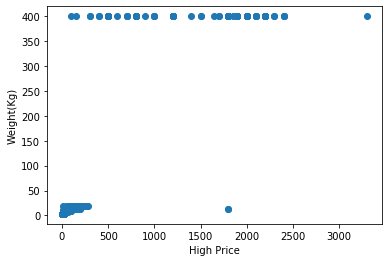

In [15]:
plt.scatter(train_set['High_Price'], train_set['Weight_Kg'])
plt.ylabel("Weight(Kg)")
plt.xlabel("High Price")
plt.show()


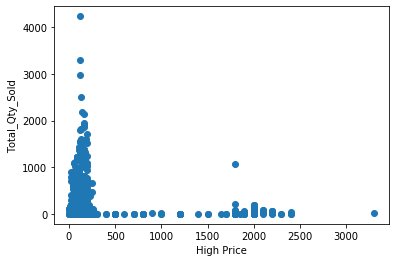

In [16]:
plt.scatter(train_set['High_Price'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("High Price")
plt.show()


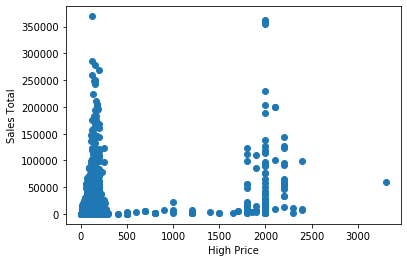

In [17]:
plt.scatter(train_set['High_Price'], train_set['Sales_Total'])
plt.ylabel("Sales Total")
plt.xlabel("High Price")
plt.show()



## 3. Exploratory Data Analysis <a name="explore"></a>
Make at least 7 plots.

### 3.1. Explore the data shape and types

### 3.2. Look for null values

### 3.3. Univariate analysis - non-graphical

see Univariate and Multivariate Analysis [Notebook] -Univariate Analysis: Non-Graphical 


### 3.4. Univariate analysis - graphical
see Univariate and Multivariate Analysis [Notebook] -Univariate Analysis: Non-Graphical 

### 3.5. Multivariate analysis - non-graphical
see Univariate and Multivariate Analysis [Notebook] - Multivariate Analysis:non-graphical

### 3.6. Multivariate analysis - graphical 
see Univariate and Multivariate Analysis [Notebook] - Multivariate Analysis:  Graphical - Up to completing the Bubble Plot

## 4. Testing the suitability of the data
### 4.1. Testing for linearity

Multiple Linear Regression - Advanced Regression Analysis [Notebook]


### 4.2. Testing for multicollinearity

Multiple Linear Regression - Advanced Regression Analysis [Notebook]
Include the corellation heatmap

### 5. Transforming the data to be most suitable to use for building a multivariate linear regression model

#### 5.1. Transforming categorical data to numerical data 

In [15]:
#Convert categorical data to numerical data
train=pd.get_dummies(train_set,drop_first=True)

#Replace spaces in column names with underscores
train.columns = train.columns.str.replace(' ','_')

In [16]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
train.shape

(1952, 179)

In [18]:
cols = list(train)
#Move column to last index
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))

#Update column names
train = train.loc[:, cols]


In [19]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,1,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,4.50


## 6. Building the regression models <a name="regress"></a>
### Method 1: A simple linear reggression model following the Least Squares Method
#### Calculating the slope and the intercept 

In [20]:
#Split predictors and response
X = train_set['Weight_Kg']
Y = train_set['avg_price_per_kg']

#Calculating x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

#Calculating Slope
b = sum((X-x_bar) * (Y-y_bar)) / sum((X-x_bar)**2)

#Calculating intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = -0.0076244934807224145
Intercept = 7.0873874015160885


#### Plot our regression line on a scatter plot

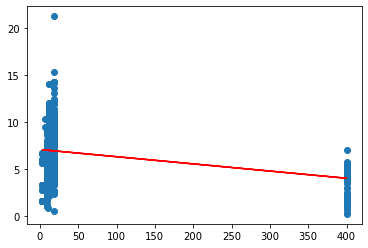

In [21]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

#Generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(X, a, b)

#Plot the graph
plt.scatter(X, Y)
plt.plot(X, y_gen2, color='red')
plt.show()

#### Assess our results

In [22]:
errors = np.array(Y - y_gen2)
np.round(errors, 2)

array([ 1.56, -2.45, -0.91, ..., -1.35, -4.22,  0.61])

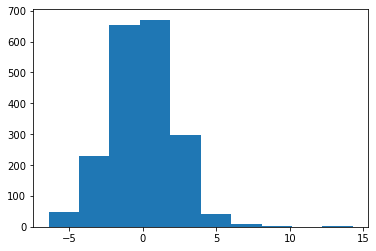

In [23]:
plt.hist(errors)
plt.show()

### Method 2: A multivariate linear regression model using sklearn

#### Show our calculations

#### Plot our results

#### Assess our results

### Method 3: A multivariate linear regression model using statsmodels

#### Show our calculations

In [6]:
#Importing the statsmodels package
import statsmodels.formula.api as sm

When I use all the Columns (179) from train, the dataframe that has our categorical values converted. I get an error that some column are not defined. So I reduced the 179 to work with 13. I got the error that Province W was not defined, so I will be dropping it and recreate my string. These errors only show up when I am constructing the model.

In [15]:
#Creating a copy of the train to work on, so any changes we make do not affect the original dataframe
train2 = train.copy()

In [19]:
#Droping the column from our copy of the train dataframe. 
train2 = train2[train2["Province_W.CAPE-BERGRIVER_ETC"] == 1]
train2 = train2.drop(["Province_W.CAPE-BERGRIVER_ETC"], axis=1)

In [23]:
#Generating the regression string
formula_str = train2.columns[-1]+' ~ '+'+'.join(train2.columns[0:12]); formula_str

'avg_price_per_kg ~ Weight_Kg+Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+Province_EASTERN_CAPE+Province_NATAL+Province_ORANGE_FREE_STATE+Province_TRANSVAAL+Province_WEST_COAST'

In [24]:
#Constructing the model using Ordinary Least Squares regression model
model2 = sm.ols(formula = formula_str, data = train2)


In [25]:
#Fitting the OLS model we constructed above
fitted = model2.fit()

In [26]:
#Viewing the fitted model summary
print(fitted.summary())

C:\Users\olive\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     78.51
Date:                Wed, 12 May 2021   Prob (F-statistic):           5.10e-73
Time:                        11:01:13   Log-Likelihood:                -768.59
No. Observations:                 440   AIC:                             1553.
Df Residuals:                     432   BIC:                             1586.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Plot our results

In [29]:
#Importing packages to show how our predictor variables interact with our reponse variable
import statsmodels.api as sm
import matplotlib.pyplot as plt

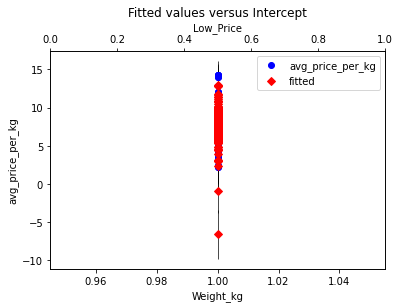

In [50]:
#Ploting the our figure using two x-axes for our predictor variables
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twiny()
fig = sm.graphics.plot_fit(fitted, 0, ax=ax1)
ax.set_ylabel("avg_price_per_kg")
ax1.set_xlabel("Weight_kg")
ax2.set_xlabel("Low_Price")
ax.set_title("Multiple Linear Regression")
plt.show()

#### Assess our results

#### Testing for independence
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


#### Testing for homoscedasticity
Do the magnitude of the risiduals increase as the fitted data increases? This will result in a cone shape and that is called heteroscedasticity. We don’t want that.
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


#### Testing for normality
Multiple Linear Regression - Advanced Regression Analysis [Notebook]
Include the QQ plot


#### Check for outliers in residuals <a name="outliers"></a>
#### Plot Cook’s distance
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


## 7. Conclusion <a name="conclude"></a>

### What we accomplished. 
### What we learnt.
